Welcome to exercise one of “Apache Spark for Scalable Machine Learning on BigData”. In this exercise you’ll apply the basics of functional and parallel programming. 

Let’s start with a simple example. Let’s consider you have a list of integers.

Let’s find out what the size of this list is.

Note that we already provide an RDD object, so please have a look at the RDD API in order to find out what function to use:
https://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD

The following link contains additional documentation:
https://spark.apache.org/docs/latest/rdd-programming-guide.html



EXERCISE 1

In [8]:
!pip install --upgrade pip


Requirement already up-to-date: pip in /opt/conda/envs/Python36/lib/python3.6/site-packages (20.0.2)


In [11]:
!pip install pyspark

     |████████████████████████████████| 217.8 MB 11 kB/s s eta 0:00:01     |███████████████                 | 102.5 MB 48.0 MB/s eta 0:00:03     |██████████████████▋             | 126.4 MB 57.4 MB/s eta 0:00:02��█▍            | 131.8 MB 57.4 MB/s eta 0:00:02     |████████████████████████        | 162.6 MB 57.4 MB/s eta 0:00:01
     |████████████████████████████████| 197 kB 57.8 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257928 sha256=7a3720c814e12e4fa27afae53d8ee520082f05558ef307660ec9fcaf535fca6b
  Stored in directory: /home/dsxuser/.cache/pip/wheels/84/30/e3/c51c5cd0229631e662d29d7b578a3e5949a4c8db033ffb70aa
Successfully built pyspark


In [12]:
if not ('sc' in locals() or 'sc' in globals()):
    print('It seems you are note running in a IBM Watson Studio Apache Spark Notebook. You might be running in a IBM Watson Studio Default Runtime or outside IBM Waston Studio. Therefore installing local Apache Spark environment for you. Please do not use in Production')
    
#     from pip import main
#     main(['install', 'pyspark==2.4.5'])
    
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession

    sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
    
    spark = SparkSession \
        .builder \
        .getOrCreate()

It seems you are note running in a IBM Watson Studio Apache Spark Notebook. You might be running in a IBM Watson Studio Default Runtime or outside IBM Waston Studio. Therefore installing local Apache Spark environment for you. Please do not use in Production


In [13]:
gt50 = lambda i: i > 50

In [14]:
rdd = sc.parallelize(range(100))

In [15]:
# please replace $$ with the correct characters
rdd.count()

100

You should see "100" as answer. Now we want to know the sum of all elements. Please again, have a look at the API documentation and complete the code below in order to get the sum.

In [16]:
rdd.sum()

4950

EXERCISE 2

In [17]:
from random import shuffle

In [18]:
rdd.filter(gt50).collect()

[51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [19]:
rdd.filter(lambda x : x > 50).collect()

[51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [20]:
rdd.filter(lambda x : x > 50).filter(lambda x: x < 75).collect()

[51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74]

EXERCISE 3


In [21]:
from pyspark.sql import Row

#Create Dataframe
df = spark.createDataFrame([Row(id=1, value='value1'),Row(id=2, value='value2')])

#Print DataFrame
df.show()

#print the schema
df.printSchema()

+---+------+
| id| value|
+---+------+
|  1|value1|
|  2|value2|
+---+------+

root
 |-- id: long (nullable = true)
 |-- value: string (nullable = true)



In [22]:
df2 = spark.createDataFrame([Row(SNo=1,Name='Arun',GPA=8),Row(SNo=2,Name='Akash',GPA=9)])

df2.show()

+---+-----+---+
|GPA| Name|SNo|
+---+-----+---+
|  8| Arun|  1|
|  9|Akash|  2|
+---+-----+---+



In [23]:
#Create Sql table/view
df.createOrReplaceTempView('df_view')

#Execute SQL query
df_result = spark.sql('select * from df_view')

df_result.show()

+---+------+
| id| value|
+---+------+
|  1|value1|
|  2|value2|
+---+------+



In [24]:
# get result as string
df_result.first().value

'value1'

In [25]:
# get result as string
df_result.first().id

1

EXERCISE 4
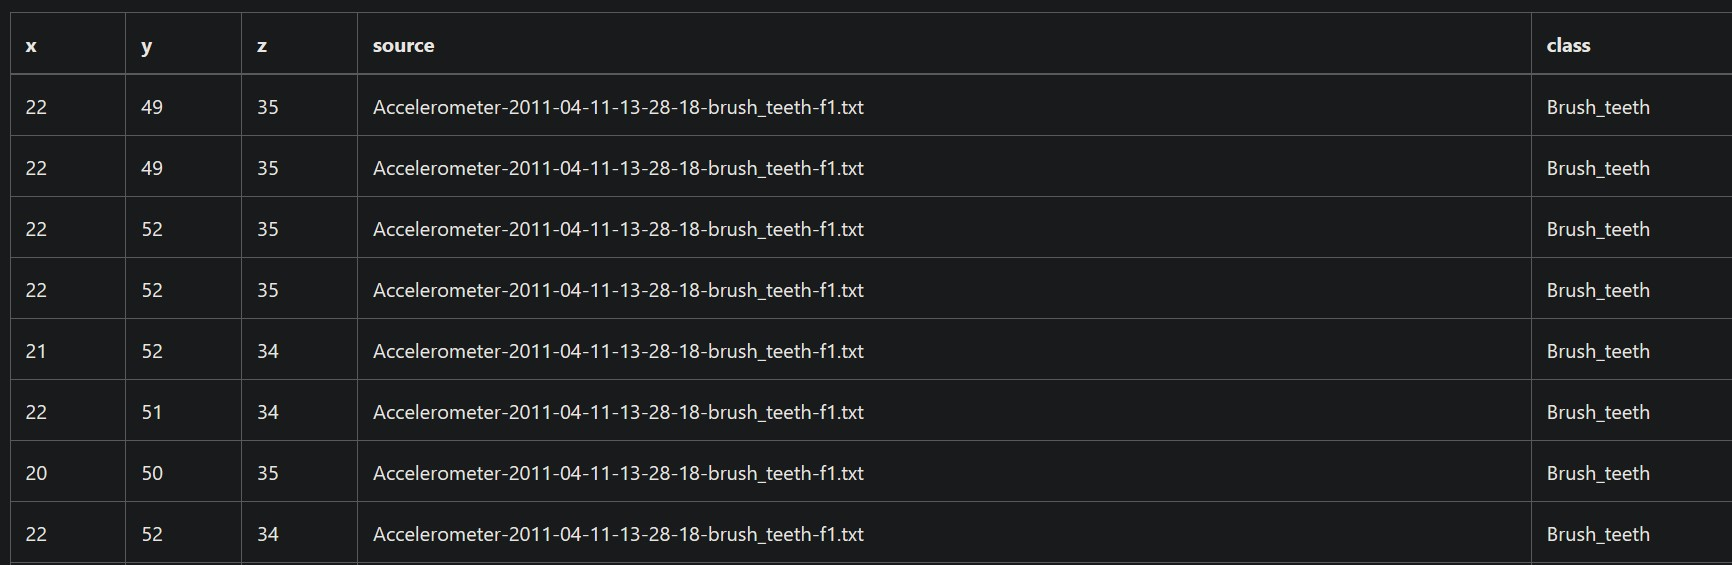

In [26]:
# delete files from previous runs
!rm -f hmp.parquet*

In [27]:

# download the file containing the data in PARQUET format
!wget https://github.com/IBM/coursera/raw/master/hmp.parquet
    
# create a dataframe out of it
df = spark.read.parquet('hmp.parquet')

# register a corresponding query table
df.createOrReplaceTempView('df')

--2020-04-21 02:03:19--  https://github.com/IBM/coursera/raw/master/hmp.parquet
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/raw/master/hmp.parquet [following]
--2020-04-21 02:03:19--  https://github.com/IBM/skillsnetwork/raw/master/hmp.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/hmp.parquet [following]
--2020-04-21 02:03:20--  https://raw.githubusercontent.com/IBM/skillsnetwork/master/hmp.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 932997 (911K) [application/octet-stream]
Savin

In [28]:
df.show()
df.printSchema()

+---+---+---+--------------------+-----------+
|  x|  y|  z|              source|      class|
+---+---+---+--------------------+-----------+
| 22| 49| 35|Accelerometer-201...|Brush_teeth|
| 22| 49| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 35|Accelerometer-201...|Brush_teeth|
| 21| 52| 34|Accelerometer-201...|Brush_teeth|
| 22| 51| 34|Accelerometer-201...|Brush_teeth|
| 20| 50| 35|Accelerometer-201...|Brush_teeth|
| 22| 52| 34|Accelerometer-201...|Brush_teeth|
| 22| 50| 34|Accelerometer-201...|Brush_teeth|
| 22| 51| 35|Accelerometer-201...|Brush_teeth|
| 21| 51| 33|Accelerometer-201...|Brush_teeth|
| 20| 50| 34|Accelerometer-201...|Brush_teeth|
| 21| 49| 33|Accelerometer-201...|Brush_teeth|
| 21| 49| 33|Accelerometer-201...|Brush_teeth|
| 20| 51| 35|Accelerometer-201...|Brush_teeth|
| 18| 49| 34|Accelerometer-201...|Brush_teeth|
| 19| 48| 34|Accelerometer-201...|Brush_teeth|
| 16| 53| 34|Accelerometer-201...|Brush_teeth|
| 18| 52| 35|

It doesn’t matter if you express your queries with SQL or the DataFrame API – it all gets boiled down into the same execution plan optimized by Tungsten and accelerated by Catalyst. You can even mix and match SQL and DataFrame API code if you like.

In [29]:
spark.sql('select class,count(*) from df group by class').show()

+--------------+--------+
|         class|count(1)|
+--------------+--------+
| Use_telephone|   15225|
| Standup_chair|   25417|
|      Eat_meat|   31236|
|     Getup_bed|   45801|
|   Drink_glass|   42792|
|    Pour_water|   41673|
|     Comb_hair|   23504|
|          Walk|   92254|
|  Climb_stairs|   40258|
| Sitdown_chair|   25036|
|   Liedown_bed|   11446|
|Descend_stairs|   15375|
|   Brush_teeth|   29829|
|      Eat_soup|    6683|
+--------------+--------+



In [30]:
df.groupBy('class').count().show()

+--------------+-----+
|         class|count|
+--------------+-----+
| Use_telephone|15225|
| Standup_chair|25417|
|      Eat_meat|31236|
|     Getup_bed|45801|
|   Drink_glass|42792|
|    Pour_water|41673|
|     Comb_hair|23504|
|          Walk|92254|
|  Climb_stairs|40258|
| Sitdown_chair|25036|
|   Liedown_bed|11446|
|Descend_stairs|15375|
|   Brush_teeth|29829|
|      Eat_soup| 6683|
+--------------+-----+



In [33]:
!pip install --user --upgrade pixiedust

Requirement already up-to-date: pixiedust in /home/dsxuser/.local/lib/python3.6/site-packages (1.1.18)


In [45]:
from pyspark.sql.functions import col
counts = df.groupBy('class').count().orderBy('count')


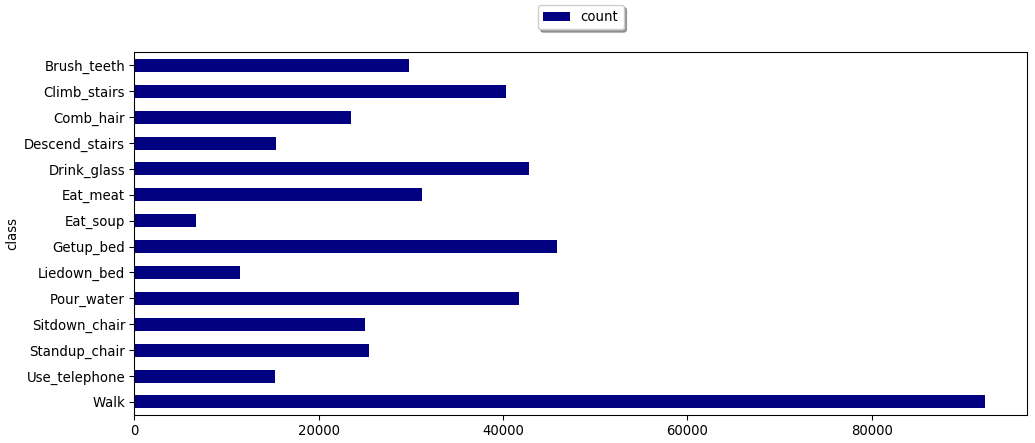

In [ ]:
import pixiedust
display(counts)

In [ ]:
spark.sql('''
    
                    select
                        count(*) as ct -- count the number of rows per class and rename it to ct
                        from df -- access the temporary query table called df backed by DataFrame df
                        group by class -- aggrecate over class
              
''').show()

In [42]:
spark.sql('''
    
            select 
                min(ct) as min, -- compute minimum value of all classes
                max(ct) as max, -- compute maximum value of all classes
                mean(ct) as mean, -- compute mean between all classes
                stddev(ct) as stddev -- compute standard deviation between all classes
                from (
                    select
                        count(*) as ct -- count the number of rows per class and rename it to ct
                        from df -- access the temporary query table called df backed by DataFrame df
                        group by class -- aggrecate over class
                )  
''').show()

+----+-----+------------------+------------------+
| min|  max|              mean|            stddev|
+----+-----+------------------+------------------+
|6683|92254|31894.928571428572|21284.893716741157|
+----+-----+------------------+------------------+



In [43]:
spark.sql('''
    select 
        *,
        max/min as minmaxratio -- compute minmaxratio based on previously computed values
        from (
            select 
                min(ct) as min, -- compute minimum value of all classes
                max(ct) as max, -- compute maximum value of all classes
                mean(ct) as mean, -- compute mean between all classes
                stddev(ct) as stddev -- compute standard deviation between all classes
                from (
                    select
                        count(*) as ct -- count the number of rows per class and rename it to ct
                        from df -- access the temporary query table called df backed by DataFrame df
                        group by class -- aggrecate over class
                )
        )   
''').show()

+----+-----+------------------+------------------+-----------------+
| min|  max|              mean|            stddev|      minmaxratio|
+----+-----+------------------+------------------+-----------------+
|6683|92254|31894.928571428572|21284.893716741157|13.80427951518779|
+----+-----+------------------+------------------+-----------------+



Alternative Command

In [44]:
from pyspark.sql.functions import col, min, max, mean, stddev

df \
    .groupBy('class') \
    .count() \
    .select([ 
        min(col("count")).alias('min'), 
        max(col("count")).alias('max'), 
        mean(col("count")).alias('mean'), 
        stddev(col("count")).alias('stddev') 
    ]) \
    .select([
        col('*'),
        (col("max") / col("min")).alias('minmaxratio')
    ]) \
    .show()


+----+-----+------------------+------------------+-----------------+
| min|  max|              mean|            stddev|      minmaxratio|
+----+-----+------------------+------------------+-----------------+
|6683|92254|31894.928571428572|21284.893716741157|13.80427951518779|
+----+-----+------------------+------------------+-----------------+



Imbalanced classes can cause pain in machine learning. Therefore let’s rebalance. In the flowing we limit the number of elements per class to the amount of the least represented class. This is called undersampling. Other ways of rebalancing can be found here:

https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

In [47]:
from pyspark.sql.functions import min

# create a lot of distinct classes from the dataset
classes = [row[0] for row in df.select('class').distinct().collect()]

# compute the number of elements of the smallest class in order to limit the number of samples per calss
min = df.groupBy('class').count().select(min('count')).first()[0]

# define the result dataframe variable
df_balanced = None

# iterate over distinct classes
for cls in classes:
    
    # only select examples for the specific class within this iteration
    # shuffle the order of the elements (by setting fraction to 1.0 sample works like shuffle)
    # return only the first n samples
    df_temp = df \
        .filter("class = '"+cls+"'") \
        .sample(False, 1.0) \
        .limit(min)
    
    # on first iteration, assing df_temp to empty df_balanced
    if df_balanced == None:    
        df_balanced = df_temp
    # afterwards, append vertically
    else:
        df_balanced=df_balanced.union(df_temp)

In [ ]:
df_balanced.createOrReplaceTempView('df_balanced')
spark.sql('select class,count(*) as count from df_balanced group by class order by count').show()

In [51]:
df_balanced.count(*).groupby(class).show()

SyntaxError: invalid syntax (<ipython-input-51-f4acff06b330>, line 1)